#1. Business Objective

Max Life Insurance wants to predict which existing health insurance customers are likely to buy vehicle insurance, aiming to:

* Improve cross-sell marketing strategies

* Boost revenue

* Optimize targeting efforts

#2. Importing library &  Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (1).csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
#check for duplicate and null
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#handling null
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


#3. Data Visualizations

* Response is the target (1 = interested in vehicle insurance, 0 = not interested).

* Check class distribution:

<Axes: xlabel='Response', ylabel='count'>

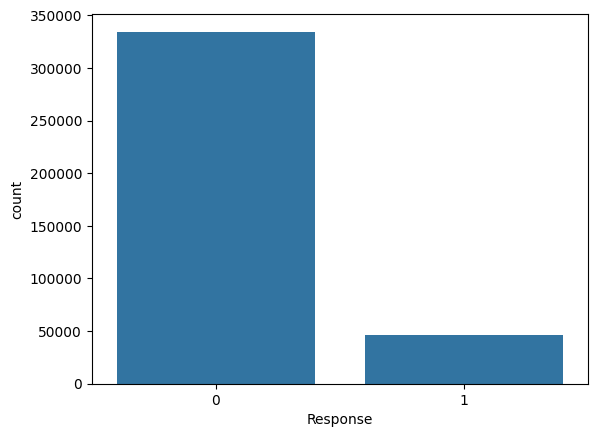

In [ ]:
import seaborn as sns
sns.countplot(x='Response', data=df)

Shows how many people are interested (1) vs not interested (0).
Result: Very imbalanced → many 0s, fewer 1s.
The data is highly imbalanced.

target variables

In [ ]:
sns.set_style('whitegrid')

# Calculate the mean only for numeric columns
df.groupby('Response').mean(numeric_only=True)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
Response,,,,,,,,
0,190611.255476,38.178227,0.997694,26.336544,0.521742,30419.160276,114.851040,154.380243
1,190152.264504,43.435560,0.999122,26.762963,0.003383,31604.092742,91.869086,154.112246


<ipython-input-13-9ed74b0b58b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='husl') # Specify x='Gender'


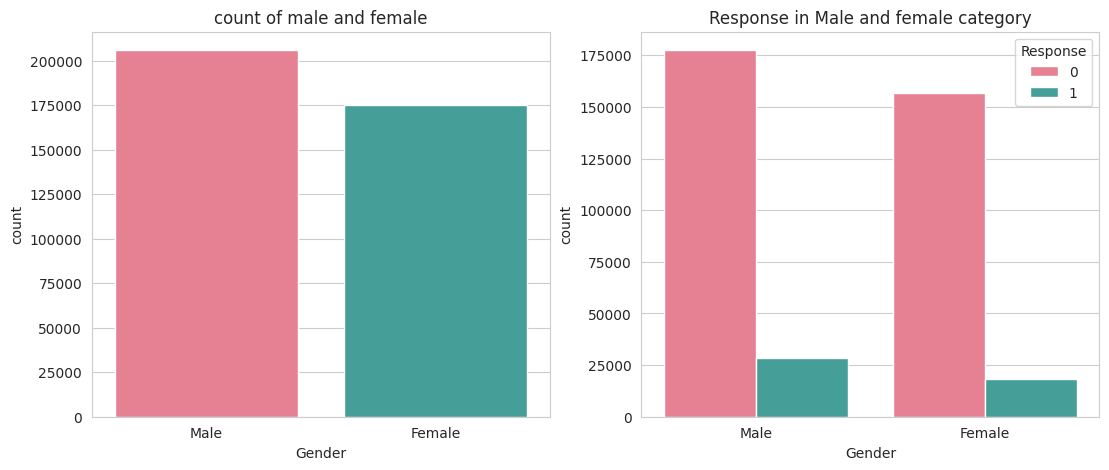

In [ ]:
#Gender
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=df, palette='husl') # Specify x='Gender'
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(x='Gender', hue='Response', data=df, palette="husl") # Specify x='Gender'
plt.title("Response in Male and female category")
plt.show()

* Shows count of Males and Females.

* Also shows how many of each gender are interested.

➡️ Male slightly more, and also more likely to buy insurance.

Age Vs Response

<Axes: xlabel='Age', ylabel='count'>

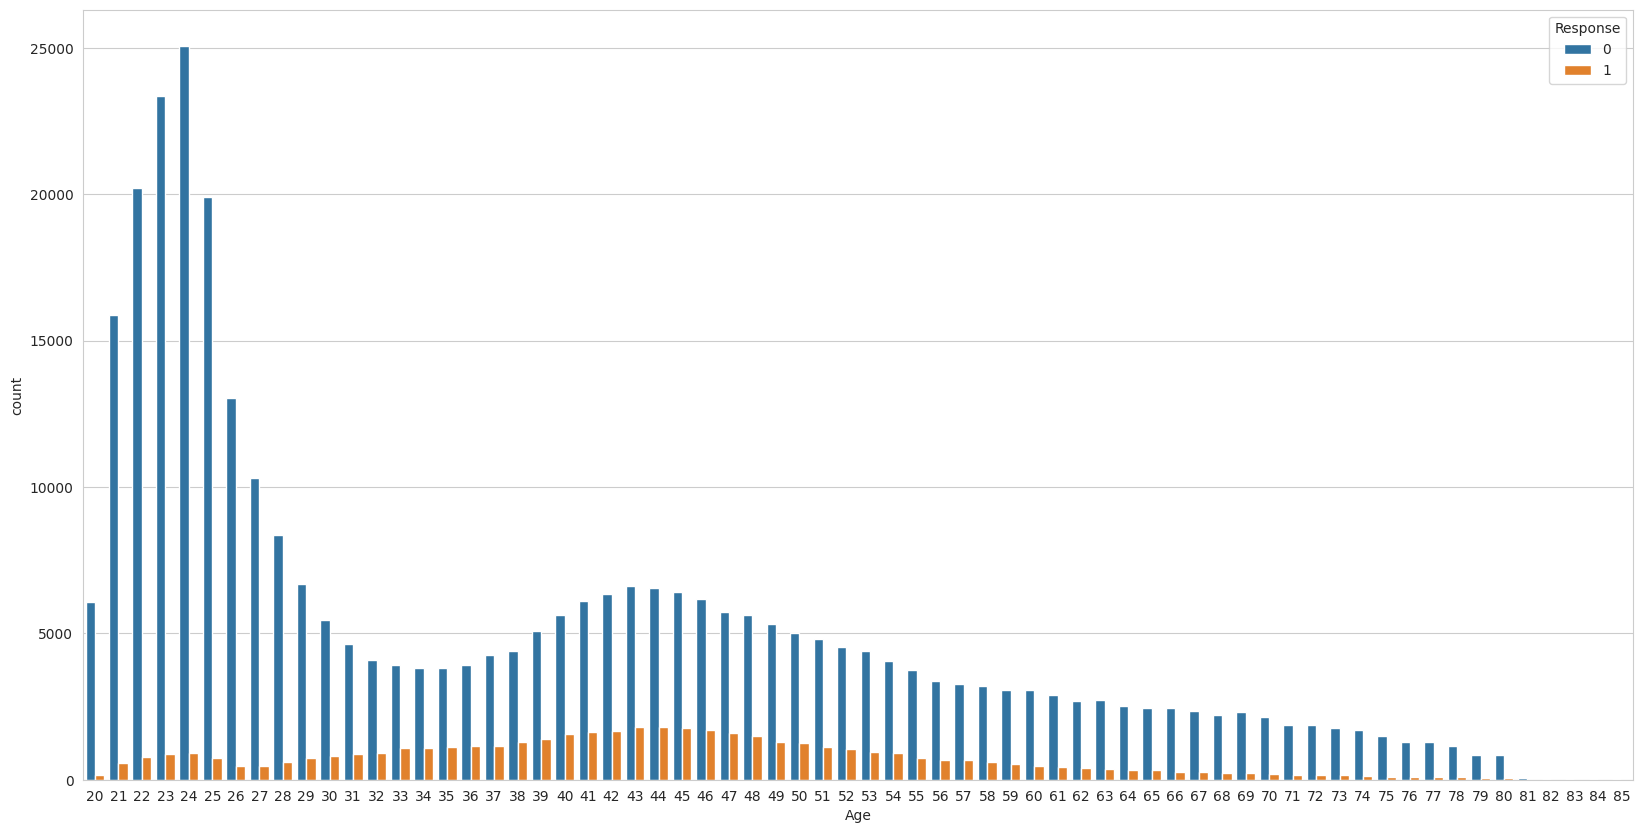

In [ ]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)

<Axes: ylabel='Age'>

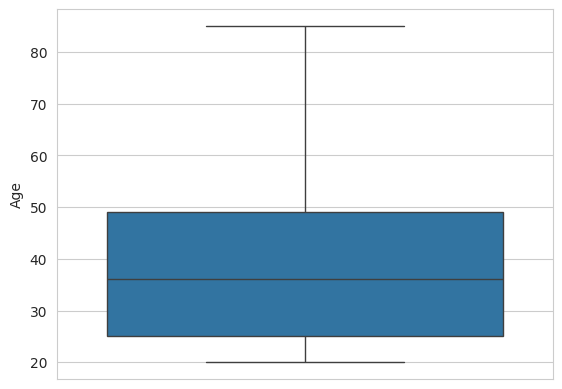

In [ ]:
sns.boxplot(df['Age'])

* Young people below 30 are not interested in vehicle insurance.
* Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* People aged between 30-60 are more likely to be interested.
*From the boxplot we can see that there no outlier in the data.

Driving License

<Axes: xlabel='Driving_License', ylabel='count'>

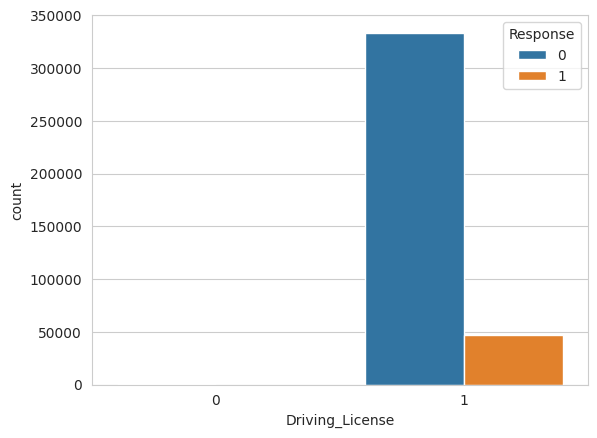

In [ ]:
#Driving License
sns.countplot(x='Driving_License', hue='Response', data=df)

Almost everyone who is interested has a driving license.

Previously_Insured Vs Response


<Axes: xlabel='Previously_Insured', ylabel='count'>

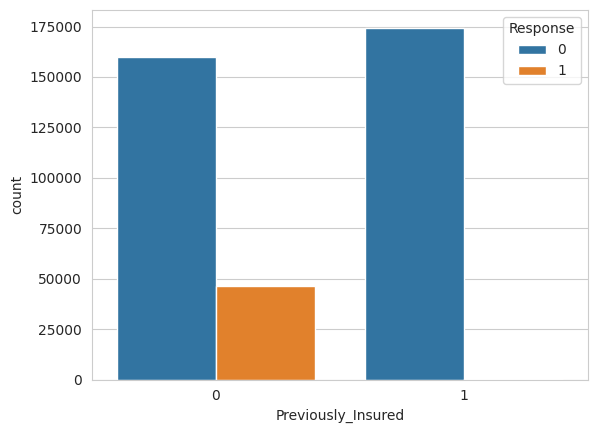

In [ ]:
#Previously_Insured Vs Response
sns.countplot(x='Previously_Insured', hue='Response', data=df)

Those who already have other insurance are not interested.

Vehicle_Age Vs Response


<Axes: xlabel='Vehicle_Age', ylabel='count'>

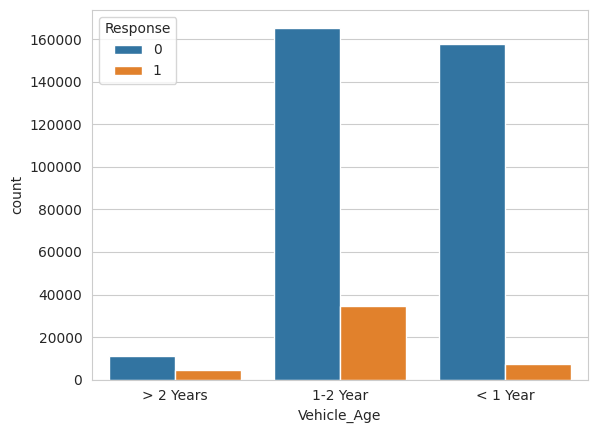

In [ ]:
#Vehicle_Age Vs Response
sns.countplot(x='Vehicle_Age', hue='Response', data=df)

Customers with 1-2 year old vehicles are more likely to buy.

Vehicles less than 1 year old → less interest.

Annual_Premium

<ipython-input-19-c5381aa9ed2d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Premium'])


<Axes: xlabel='Annual_Premium', ylabel='Density'>

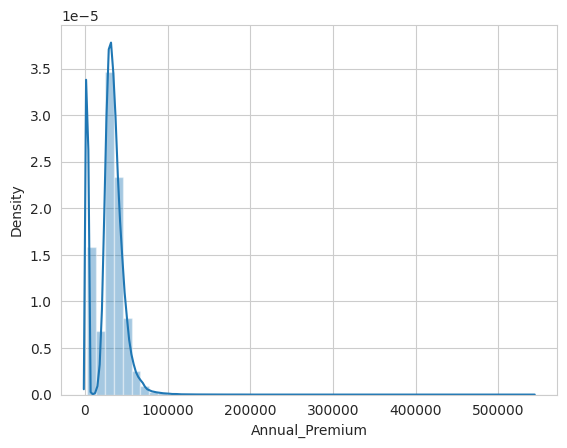

In [ ]:
#Annual_Premium
sns.distplot(df['Annual_Premium'])

<Axes: ylabel='Annual_Premium'>

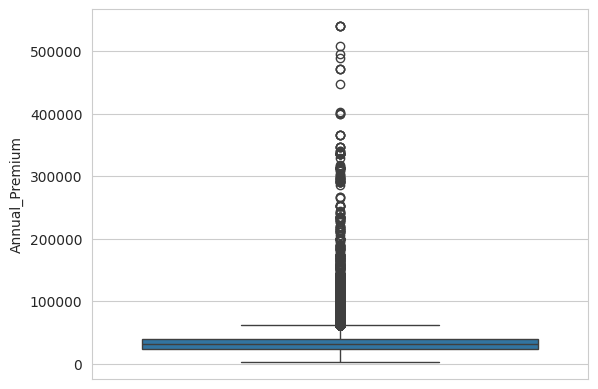

In [ ]:
#boxplot of Annual premium
sns.boxplot(df['Annual_Premium'])

The values are right-skewed (most values are small, few are large).

There are many outliers.

Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

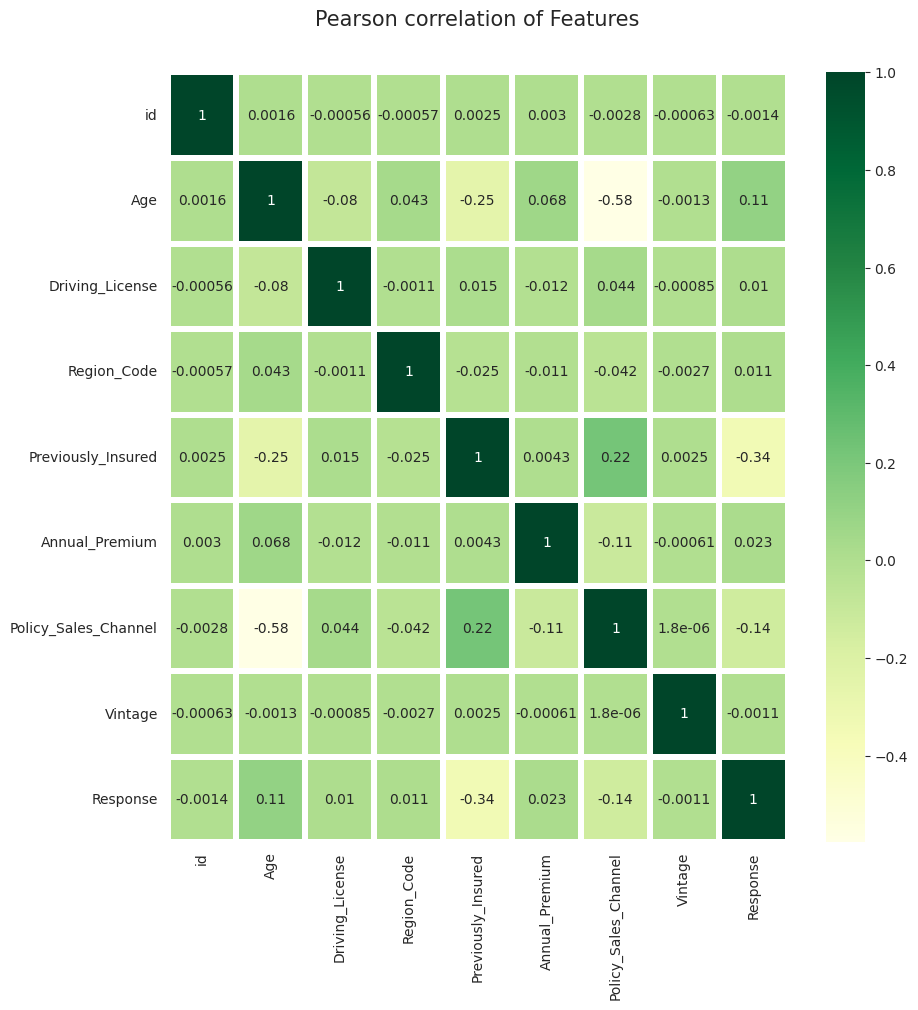

In [ ]:
#Correlation Matrix
# Calculate the correlation matrix only for numeric columns
corr = df.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)

Shows how strongly each column is related to others.

➡️ Vintage has very low correlation with target → can be dropped later.

# 4. Feature Engineering & Encoding

We are preparing the dataset for machine learning by converting text (categorical) columns into numbers.

✅ Why we do this?
Because most machine learning models can only understand numbers — not text like "Male", "Female", "> 2 Years", etc.

In [ ]:
#Label encoding
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


there is no duplicated rows in the dataset


In [ ]:
df.dtypes

,0
id,int64
Gender,int64
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,int64
Vehicle_Damage,int64
Annual_Premium,float64
Policy_Sales_Channel,float64


##Seprating dependent and independent variables

🎯 What are Independent and Dependent Variables?
* Independent variables (X):

These are the input features used to make predictions.

Example: Age, Gender, Vehicle_Age, etc.

* Dependent variable (y):

This is the output we are trying to predict.

In our case: Response (whether the customer buys vehicle insurance or not)

In [ ]:
x=df.drop(['Response'],axis=1) #contain all  independent variable
y=df['Response']#dependent variable

Now:

X contains features like Age, Gender, Vehicle_Damage, etc.

y contains 0 or 1 (buy insurance or not)

Feature Selection


[0.19266972 0.00570373 0.13879197 0.00047544 0.09645946 0.0555674
 0.01613927 0.07537938 0.16272715 0.06953187 0.18655461]


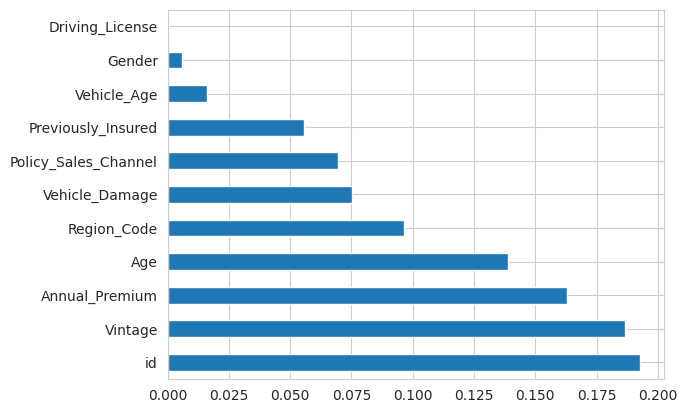

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

We can remove less important features from the data set

In [ ]:
x=x.drop(['Driving_License','Gender'],axis=1)

###Handling Imbalanced data
* When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

We are addressing class imbalance by using RandomOverSampler from the imblearn library. This technique balances the classes by oversampling the minority class to match the majority class size.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y) # Changed fit_sample to fit_resample

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


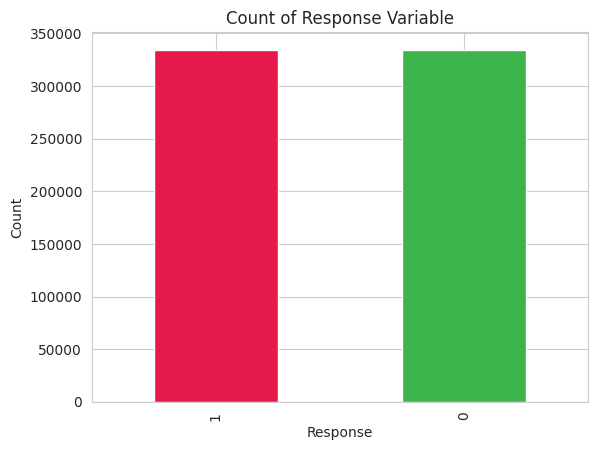

In [ ]:
y_new.value_counts().plot(kind='bar', color=['#e6194b', '#3cb44b'])  # custom color like 'husl'
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Count of Response Variable')
plt.show()

spliting of data into train and test data

In [ ]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(468158, 9) (200640, 9) (468158,) (200640,)


* We apply StandardScaler to scale features so that each feature has mean 0 and standard deviation 1.

* We fit the scaler only on training data (fit_transform), then apply the same transformation to test data (transform).

* This prevents data leakage from test to train set.

#5. Model Selection

* Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

* Dataset has more than 300k records

* cannot go with SVM Classifier as it takes more time to train as dataset increase

* Idea is to start selection of models as:

 1.Logistic Regression

 2.Random Forest

 3.XGBClassifier

##1.Logistic Regression

In [ ]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]

In [ ]:
acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.783747009569378
ROC_AUC Score: 0.8338904605026828


In [ ]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61449
           1       0.98      0.70      0.82    139191

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



###ROC Curve

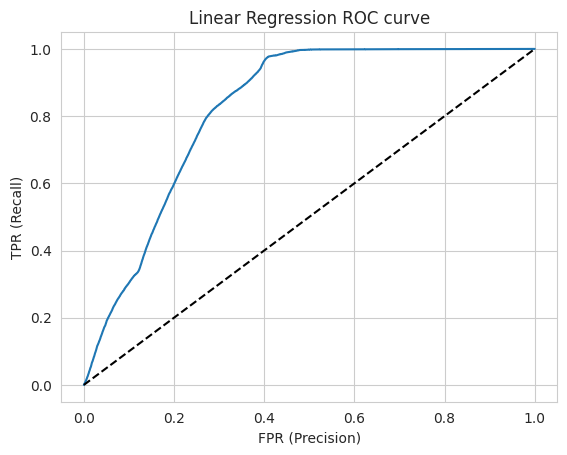

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[59194 41134]
 [ 2255 98057]]


<Axes: >

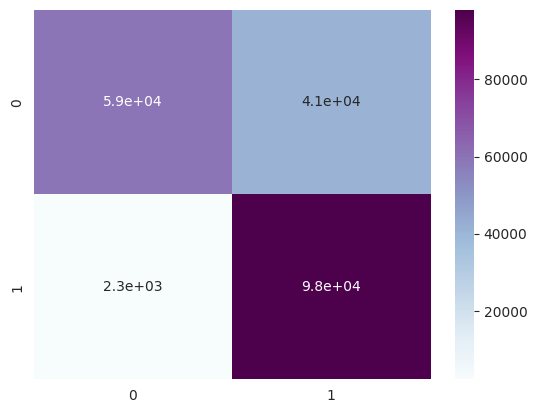

In [ ]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

##2.RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]

In [ ]:
AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.9445773524720893
ROC_AUC Score: 0.9495609468306225


In [ ]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89762
           1       1.00      0.90      0.95    110878

    accuracy                           0.94    200640
   macro avg       0.94      0.95      0.94    200640
weighted avg       0.95      0.94      0.94    200640



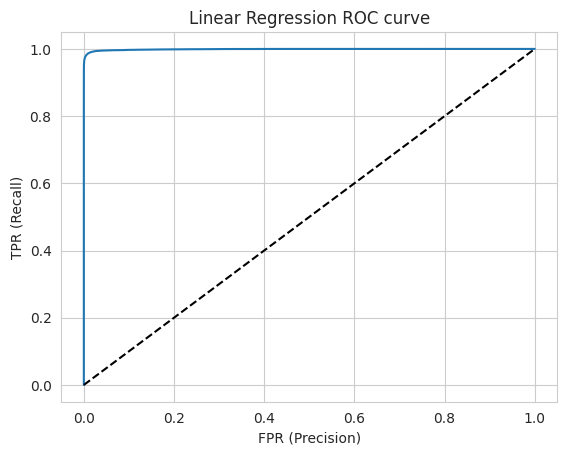

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[ 89485    277]
 [ 10843 100035]]


<Axes: >

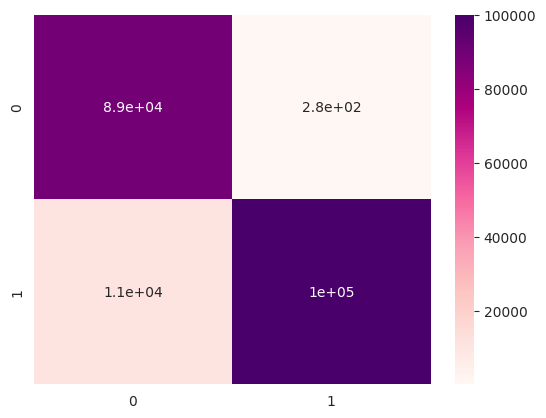

In [ ]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

##3. XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

In [ ]:
acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.813646331738437
ROC_AUC Score: 0.8347129073157208


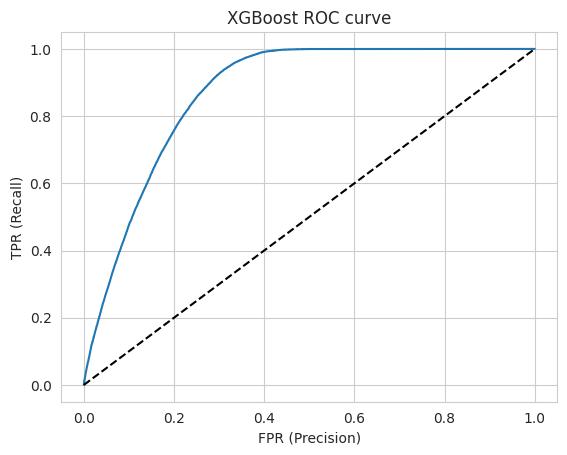

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[69048 31280]
 [ 6110 94202]]


<Axes: >

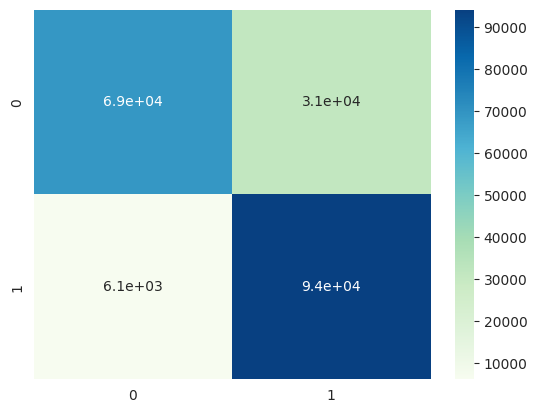

In [ ]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

#6. Comparing the model

In [ ]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783747,0.977520,0.704478,0.818837,0.833890
Randomforest,0.944577,0.997239,0.902208,0.947346,0.949561
XGBClassifier,0.813646,0.939090,0.750721,0.834407,0.834713


The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

Random Forest clearly outperforms the other two models on all metrics. It has very high accuracy, recall, precision, F1 score, and ROC AUC.

XGBoost performs better than Logistic Regression but not as well as Random Forest.

Logistic Regression has good recall but lower precision compared to tree-based models, indicating more false positives.

#Conclusion

* Customers of age between 30 to 60 are more likely to buy insurance.
* Customers with Driving License have higher chance of buying Insurance.
* Customers with Vehicle_Damage are likely to buy insurance.
* The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.
* comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.